<h1>WGU D212 TASK 1 REV 5 - MATTINSON</h1>

In [1]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# import and configure packages
from imports import *
%matplotlib inline
warnings.filterwarnings('ignore')

W:\code\wgu\py39\scripts\python.exe
python version: 3.9.7
pandas version: 1.4.1
numpy version: 1.22.1
scipy version: 1.7.3
sklearn version: 1.0.2
matplotlib version: 3.5.1
seaborn version: 0.11.2


In [3]:
from helpers import *

get_course_filename_str version: 1.5
save_course_table_csv version: 1.4
describe_dataframe_type version: 1.1
create_scatter_plot_fig version: 1.1
create_barplot_num_vs_cat_fig version: 1.9
create_distribution_plot_from_feature_fig version: 1.9
get_unique_values_list version: 1.2
create_correlation_matrix version: 1.2
get_redundant_pairs version: 1.0
get_top_n_correlations version: 1.0
create_simple_histogram_numerical_feature_fig version: 1.10
create_stacked_barplot_cat_or_bool_feature_fig version: 1.7
create_stacked_histogram_num_feature_fig version: 1.6


In [4]:
#constants
random_state = 42
plotColor = ['b','g','r','m','c', 'y']
markers = ['+','o','*','^','v','>','<']

In [5]:
# import raw customer data
df_raw = pd.read_csv('data/churn_clean.csv')
df_raw.shape

(10000, 50)

In [6]:
# remove unwanted data
df_cleaned = df_raw.drop(columns=[
    'CaseOrder','UID', 'County', 
    'Interaction', 'City', 
    'Job', 'Zip','Population',
    'Lat', 'Lng','Item1','Item2',
    'Item3','Item4','Item5','Item6',
    'Item7','Item8'
])
df_cleaned.shape

(10000, 32)

In [7]:
# filter for lost customers
df_churn = df_cleaned.loc[(df_cleaned.Churn=="Yes")]
df_churn.shape

(2650, 32)

In [8]:
# filter numerical float variables
df_numerical = df_churn.select_dtypes(include="float")
df_numerical.info()
df_numerical.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2650 entries, 1 to 9979
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Income              2650 non-null   float64
 1   Outage_sec_perweek  2650 non-null   float64
 2   Tenure              2650 non-null   float64
 3   MonthlyCharge       2650 non-null   float64
 4   Bandwidth_GB_Year   2650 non-null   float64
dtypes: float64(5)
memory usage: 124.2 KB


(2650, 5)

In [9]:
# rename columns to facilitate output
df_numerical.rename(columns = {
    'Income':'INC', 
    'Outage_sec_perweek':'OUT',
    'Tenure':'TEN',
    'MonthlyCharge':'MCH',
    'Bandwidth_GB_Year':'BAN'
}, inplace = True)
df_numerical.info()
df_numerical.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2650 entries, 1 to 9979
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   INC     2650 non-null   float64
 1   OUT     2650 non-null   float64
 2   TEN     2650 non-null   float64
 3   MCH     2650 non-null   float64
 4   BAN     2650 non-null   float64
dtypes: float64(5)
memory usage: 124.2 KB


(2650, 5)

In [10]:
# describe numerical data 
df_numerical.describe().round(2)

,INC,OUT,TEN,MCH,BAN
count,2650.00,2650.00,2650.00,2650.00,2650.00
mean,40085.76,10.00,13.15,199.30,1785.01
std,28623.99,2.97,15.58,41.27,1375.37
min,348.67,0.23,1.00,92.46,248.18
25%,19234.99,8.02,4.07,167.48,981.30
50%,33609.94,9.96,7.87,200.12,1357.83
75%,54178.77,11.95,13.76,232.64,1904.88
max,189938.40,21.21,71.65,290.16,7096.49


In [11]:
# describe variables as continuous or categorical
describe_dataframe_type(df_numerical)


1. INC is numerical (CONTINUOUS) - type: float64.
  Min: 348.670  Max: 189938.400  Std: 28623.988

2. OUT is numerical (CONTINUOUS) - type: float64.
  Min: 0.232  Max: 21.207  Std: 2.970

3. TEN is numerical (CONTINUOUS) - type: float64.
  Min: 1.000  Max: 71.646  Std: 15.577

4. MCH is numerical (CONTINUOUS) - type: float64.
  Min: 92.455  Max: 290.160  Std: 41.268

5. BAN is numerical (CONTINUOUS) - type: float64.
  Min: 248.179  Max: 7096.495  Std: 1375.370


In [12]:
save_course_table_csv(data=df_cleaned, 
    title='CLEANED', title_only=True )

,0,1,2,3
Customer_id,K409198,S120509,K191035,D90850
State,AK,MI,OR,CA
Area,Urban,Urban,Urban,Suburban
TimeZone,America/Sitka,America/Detroit,America/Los_Angeles,America/Los_Angeles
Children,0,1,4,1
Age,68,27,50,48
Income,28561.99,21704.77,9609.57,18925.23
Marital,Widowed,Married,Widowed,Married
Gender,Male,Female,Female,Male
Churn,No,Yes,No,No


shape: (10000, 32)
Table saved to: TABLES/CLEANED.CSV


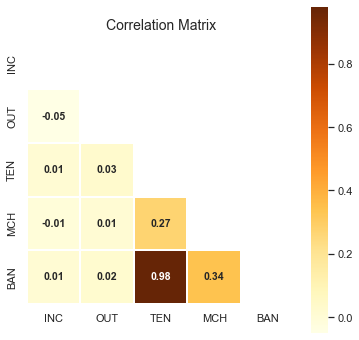

In [13]:
# use heatmap graph to identify highly correlated variables
def Generate_heatmap_graph(corr, chart_title, mask_uppertri=False ):
    """ Based on features , generate correlation matrix """
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = mask_uppertri
    fig,ax = plt.subplots(figsize=(6,6))
    sns.heatmap(corr
                , mask = mask
                , square = True
                , annot = True
                , annot_kws={'size': 10.5, 'weight' : 'bold'}
                , cmap=plt.get_cmap("YlOrBr")
                , linewidths=.1)
    plt.title(chart_title, fontsize=14)
    plt.show()
    
Generate_heatmap_graph(
    round(df_numerical.corr(),2), 
    chart_title = 'Correlation Matrix',
    mask_uppertri = True)    

In [14]:
# remove highly correlated variables
df_final = df_numerical.drop(columns=['BAN'])
df_final.info()
df_final.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2650 entries, 1 to 9979
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   INC     2650 non-null   float64
 1   OUT     2650 non-null   float64
 2   TEN     2650 non-null   float64
 3   MCH     2650 non-null   float64
dtypes: float64(4)
memory usage: 103.5 KB


(2650, 4)

In [15]:
# standardize remaining numerical data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_final.values)
df_standardized = pd.DataFrame(scaled_features,
        index=df_final.index, 
      columns=df_final.columns)
df_standardized.describe().round(2)

,INC,OUT,TEN,MCH
count,2650.00,2650.00,2650.00,2650.00
mean,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-1.39,-3.29,-0.78,-2.59
25%,-0.73,-0.67,-0.58,-0.77
50%,-0.23,-0.01,-0.34,0.02
75%,0.49,0.66,0.04,0.81
max,5.24,3.77,3.76,2.20


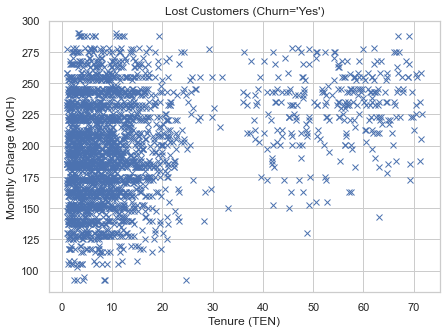

In [16]:
# create scatter plot of lost customers
fig, ax = plt.subplots(figsize =(7, 5))
plt.plot(df_numerical["TEN"], df_numerical["MCH"], marker="x", linestyle="")
plt.xlabel("Tenure (TEN)")
plt.ylabel("Monthly Charge (MCH)")
plt.title("Lost Customers (Churn='Yes')")
fig.savefig("figures/fig_1", dpi=150) 

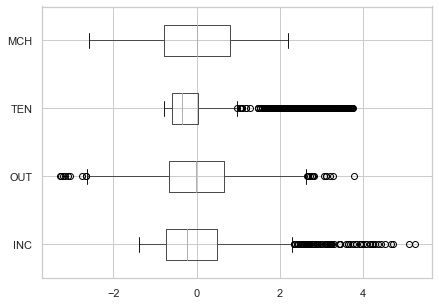

In [17]:
# use boxplot to look for outliers
fig, ax = plt.subplots(figsize =(7, 5))
ax = df_standardized.boxplot(vert=False)

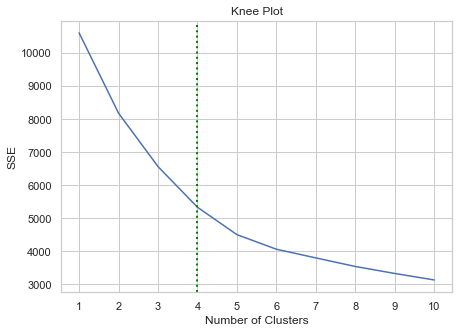

In [18]:
# create knee plot, adapted code (Arvai, 2022)
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42 }
sse = [] # list of SSE values for each k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)
fig, ax = plt.subplots(figsize =(7, 5))
knee = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Knee Plot")
plt.axvline(x=knee.elbow, color='green', ls=':', lw=2,)
fig.savefig("figures/fig_2", dpi=150)

In [19]:
# optimum point on knee plot
'Optimum: ({}, {:.3f})'.format(knee.elbow, sse[knee.elbow-1])

'Optimum: (4, 5326.264)'

In [27]:
# code to perform a K-means clustering analysis
n_clusters=knee.elbow
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42 }
kmeans = KMeans(n_clusters=n_clusters,
        **kmeans_kwargs)
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=4, random_state=42)

In [21]:
# lowest SSE value
kmeans.inertia_

5326.264140449153

In [22]:
# final locations of the centroid
kmeans.cluster_centers_

array([[-0.3155283 , -0.00332149, -0.28695986,  0.85706173],
       [-0.03928203,  0.08277377,  2.67428715,  0.75521625],
       [ 1.60091424, -0.30283788, -0.28908806, -0.20828393],
       [-0.40795062,  0.11145736, -0.34687639, -0.8558805 ]])

In [23]:
# number of iterations required to converge
kmeans.n_iter_

12

In [24]:
# final cluster labels
kmeans.labels_

array([0, 3, 3, ..., 1, 1, 1])

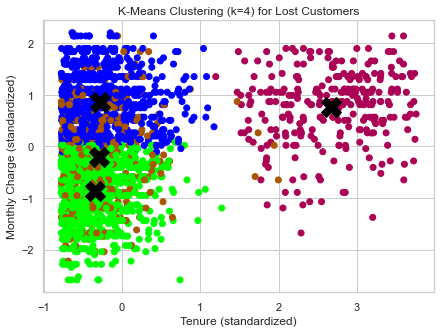

In [25]:
# final K-means analysis plot
fig, ax = plt.subplots(figsize =(7, 5))
title = 'K-Means Clustering (k=' + str(n_clusters) + ') for Lost Customers'
ax.scatter(x=df_standardized['TEN'],y=df_standardized['MCH'],
    c=kmeans.labels_,cmap='brg')
ax.scatter(x=kmeans.cluster_centers_[:,2],
    y=kmeans.cluster_centers_[:,3],
    color='black', marker='X',s=400 )
ax.set_xlabel('Tenure (standardized)')
ax.set_ylabel('Monthly Charge (standardized)')
plt.title(title)
fig.savefig("figures/fig_3", dpi=150)

In [26]:
# python moment
favorite_python_quote = "None_shall pass._B.K."
words = favorite_python_quote.split(' ')
for w in words:
    print(pyfiglet.figlet_format(w))

 _   _                          _           _ _ 
| \ | | ___  _ __   ___     ___| |__   __ _| | |
|  \| |/ _ \| '_ \ / _ \   / __| '_ \ / _` | | |
| |\  | (_) | | | |  __/   \__ \ | | | (_| | | |
|_| \_|\___/|_| |_|\___|___|___/_| |_|\__,_|_|_|
                      |_____|                   

                           ____   _  __  
 _ __   __ _ ___ ___      | __ ) | |/ /  
| '_ \ / _` / __/ __|     |  _ \ | ' /   
| |_) | (_| \__ \__ \_    | |_) || . \ _ 
| .__/ \__,_|___/___(_)___|____(_)_|\_(_)
|_|                  |_____|             

